In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GaussianNoise
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
from imutils import paths
import numpy as np
import argparse
import cv2
import os
import random
import matplotlib.pyplot as plt

# Fashion MNist

In [5]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Similar to the MNIST digit dataset, the Fashion MNIST dataset includes:

- 60,000 training examples
- 10,000 testing examples
- 10 classes
- 28×28 grayscale/single channel images

The ten fashion class labels include:

- T-shirt/top
- Trouser/pants
- Pullover shirt
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

Um mehr Trainingsdaten zu erzeugen, werden alle Bilder an der vertikalen Achse gespiegelt.
So bekommt man ohne viel Aufwand ein doppelt so großes Datenset.

In [11]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

print(trainX.shape)
print(trainY.shape)


fliped_images = trainX[:,:,::-1]
trainX = np.append(trainX, fliped_images, axis=0)
trainY = np.append(trainY, trainY)


print(trainX.shape)
print(trainY.shape)

fliped_images = testX[:,:,::-1]
testX = np.append(testX, fliped_images, axis=0)
testY = np.append(testY, testY)

print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(120000, 28, 28)
(120000,)
(20000, 28, 28)
(20000,)


# Visualisieren der Daten



T-shirt/top


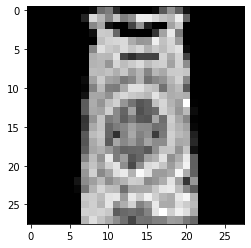

Trouser


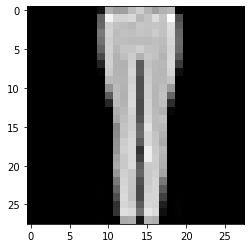

Pullover


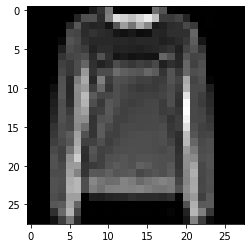

Dress


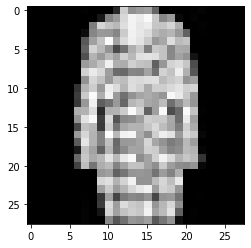

Coat


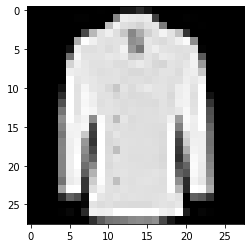

Sandal


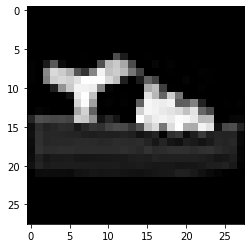

Shirt


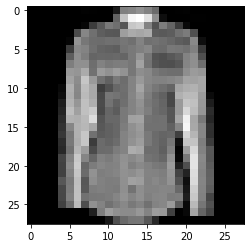

Sneaker


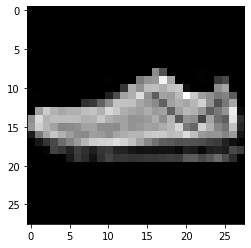

Bag


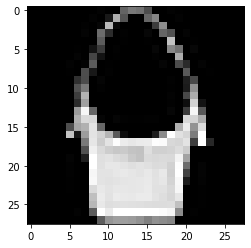

Ankle boot


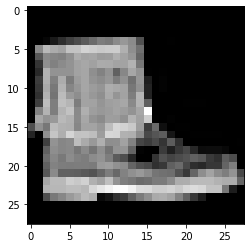

In [8]:
import random

# showing one random item of category
for i in range(0, 10):
    # getting index of category
    x = np.where(trainY == i)
    l = x[0].shape
    l = l[0]
    # get one randome index of the category
    z = random.randint(0, l)
    y = x[0][z]
    print(labels[i])
    # showing the randome example of the category
    plt.imshow(trainX[y], cmap="gray")
    plt.show()

In [15]:
trainX = trainX.reshape(120000, 784)
testX = testX.reshape(20000, 784)
print(trainX.shape)
print(testX.shape)

(120000, 784)
(20000, 784)


In [18]:
trainY = utils.to_categorical(trainY)
testY = utils.to_categorical(testY)

# Trainineren eines FF-Netzes

In [20]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation="relu"))
model.add(Dense(300, activation="relu", kernel_initializer="uniform"))
model.add(Dense(200, activation="relu", kernel_initializer="uniform"))
model.add(Dense(100, activation="relu", kernel_initializer="uniform"))
model.add(Dense(50, activation="relu", kernel_initializer="uniform"))
model.add(Dense(25, activation="relu", kernel_initializer="uniform"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer='RMSprop', metrics=["accuracy"])

In [21]:
history = model.fit(trainX, trainY, validation_split=0.20, epochs=20, batch_size=6000, verbose=1)

Train on 96000 samples, validate on 24000 samples
Epoch 1/20
96000/96000 [==============================] - 4s 45us/sample - loss: 2.0165 - accuracy: 0.2554 - val_loss: 1.4529 - val_accuracy: 0.4057
Epoch 2/20
96000/96000 [==============================] - 3s 35us/sample - loss: 1.3810 - accuracy: 0.5109 - val_loss: 1.3112 - val_accuracy: 0.4764
Epoch 3/20
96000/96000 [==============================] - 4s 42us/sample - loss: 0.9948 - accuracy: 0.6142 - val_loss: 1.0158 - val_accuracy: 0.6223
Epoch 4/20
96000/96000 [==============================] - 3s 33us/sample - loss: 0.8767 - accuracy: 0.6604 - val_loss: 0.8587 - val_accuracy: 0.7111
Epoch 5/20
96000/96000 [==============================] - 3s 35us/sample - loss: 0.8070 - accuracy: 0.7024 - val_loss: 0.8810 - val_accuracy: 0.6780
Epoch 6/20
96000/96000 [==============================] - 4s 38us/sample - loss: 0.6862 - accuracy: 0.7455 - val_loss: 0.5669 - val_accuracy: 0.8032
Epoch 7/20
96000/96000 [==============================] 

# Berechnen der Erkennungsrate auf dem Testset

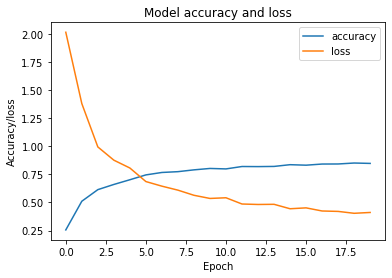

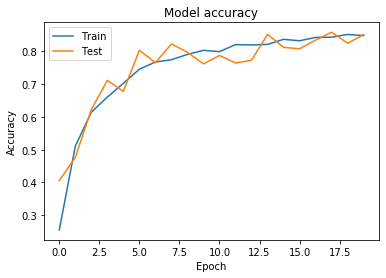

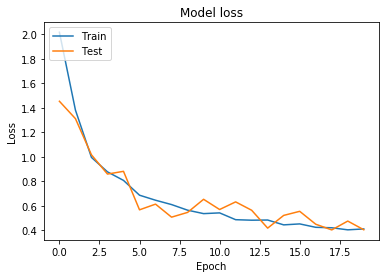

loss: 0.43185448495149614, accuracy: 84.32999849319458%


In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Accuracy/loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(loss, accuracy) = model.evaluate(testX, testY, verbose=0)
print(f"loss: {loss}, accuracy: {accuracy * 100}%")

# Normalize inputs

Normalisieren Sie die inputs mittel mean/stddev Normalisierung 

In [24]:
train_means = trainX.mean(axis=0)
train_stds =trainX.std(axis=0)

trainX = trainX - train_means
trainX = trainX / train_stds

testX = testX - train_means
testX = testX / train_stds

In [25]:
trainX = trainX / 255
testX = testX / 255

# Trainieren Sie das Netz wie open

# Verwenden Sie Dropout

30%
25%
20%
15%
10%
5%


In [26]:
trainX = trainX.reshape((-1, 28, 28, 1))
testX = testX.reshape((-1, 28, 28, 1))

In [30]:
dropout_model = Sequential()

dropout_model.add(Conv2D(64, (3, 3), padding='same', input_shape = (28, 28, 1), activation = 'relu'))
dropout_model.add(MaxPooling2D(pool_size = (2, 2)))
dropout_model.add(Dropout(0.25))

dropout_model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
dropout_model.add(MaxPooling2D(pool_size = (2, 2)))
dropout_model.add(Dropout(0.25))

dropout_model.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
dropout_model.add(MaxPooling2D(pool_size = (2, 2)))
dropout_model.add(Dropout(0.25))
dropout_model.add(Flatten())

dropout_model.add(Dense(500, activation="relu"))
dropout_model.add(Dropout(0.30))
dropout_model.add(Dense(300, activation="relu"))
dropout_model.add(Dropout(0.25))
dropout_model.add(Dense(200, activation="relu"))
dropout_model.add(Dropout(0.20))
dropout_model.add(Dense(100, activation="relu"))
dropout_model.add(Dropout(0.15))
dropout_model.add(Dense(50, activation="relu"))
dropout_model.add(Dropout(0.10))
dropout_model.add(Dense(25, activation="relu"))
dropout_model.add(Dropout(0.05))
dropout_model.add(Dense(10, activation="softmax"))

dropout_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

In [31]:
history = dropout_model.fit(trainX, trainY, validation_split=0.20, epochs=40, batch_size=4800, verbose=1)

Train on 96000 samples, validate on 24000 samples
Epoch 1/40
96000/96000 [==============================] - 349s 4ms/sample - loss: 2.2765 - accuracy: 0.1189 - val_loss: 2.1375 - val_accuracy: 0.1235
Epoch 2/40
96000/96000 [==============================] - 306s 3ms/sample - loss: 1.9263 - accuracy: 0.2688 - val_loss: 1.5698 - val_accuracy: 0.4295
Epoch 3/40
96000/96000 [==============================] - 314s 3ms/sample - loss: 1.4867 - accuracy: 0.4313 - val_loss: 1.2310 - val_accuracy: 0.5609
Epoch 4/40
96000/96000 [==============================] - 314s 3ms/sample - loss: 1.2223 - accuracy: 0.5491 - val_loss: 0.9684 - val_accuracy: 0.6708
Epoch 5/40
96000/96000 [==============================] - 292s 3ms/sample - loss: 0.9888 - accuracy: 0.6376 - val_loss: 0.7544 - val_accuracy: 0.7280
Epoch 6/40
96000/96000 [==============================] - 299s 3ms/sample - loss: 0.8346 - accuracy: 0.7003 - val_loss: 0.6593 - val_accuracy: 0.7543
Epoch 7/40
96000/96000 [==========================

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Accuracy/loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(loss, accuracy) = dropout_model.evaluate(testX, testY, verbose=0)
print(f"loss: {loss}, accuracy: {accuracy * 100}%")

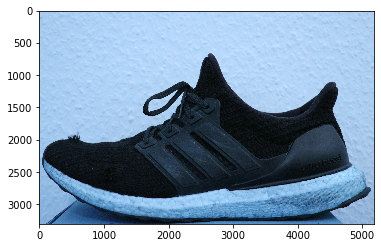

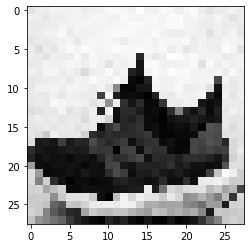

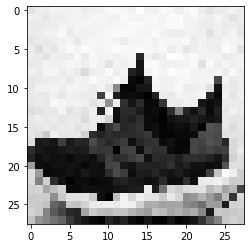

[[1.0801748e-23 0.0000000e+00 2.3562854e-06 5.9660352e-34 1.4402313e-17
  0.0000000e+00 9.9999762e-01 0.0000000e+00 3.1417761e-30 0.0000000e+00]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
6
Shirt


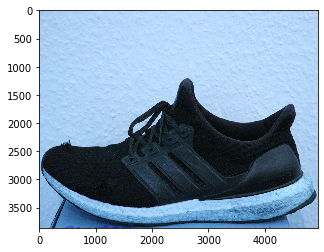

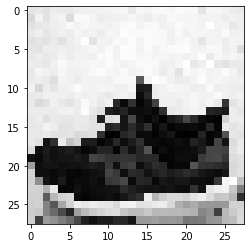

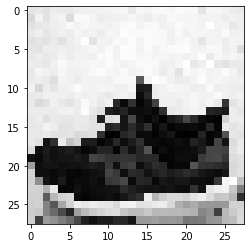

[[1.1448790e-24 2.3894197e-25 2.6800644e-28 4.6519270e-29 0.0000000e+00
  1.5387542e-11 0.0000000e+00 1.1538504e-30 1.0000000e+00 1.2976422e-20]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
8
Bag


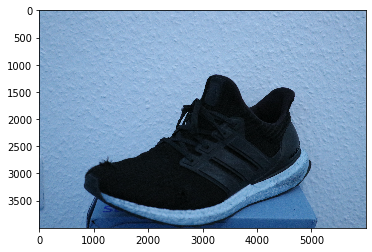

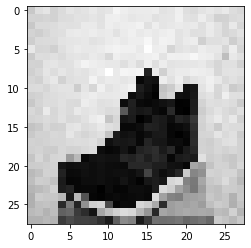

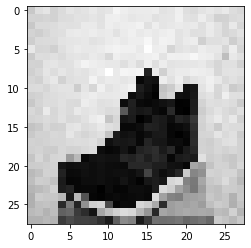

[[1.6345595e-14 7.2234829e-10 6.2251979e-19 1.9228662e-17 1.4671206e-24
  9.9999785e-01 3.0825704e-24 9.4660391e-12 1.4425418e-12 2.1845144e-06]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
5
Sandal


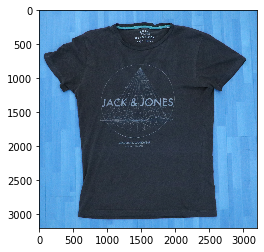

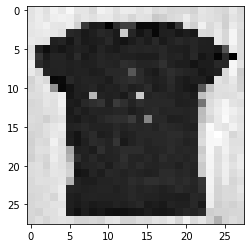

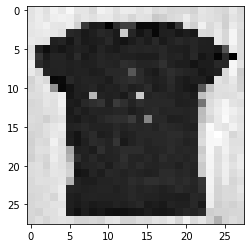

[[3.8085018e-11 2.6603109e-14 9.9576640e-01 6.4807225e-13 4.2333850e-03
  5.2774462e-18 2.3556255e-07 4.4102597e-19 2.9866069e-16 2.8428421e-20]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
2
Pullover


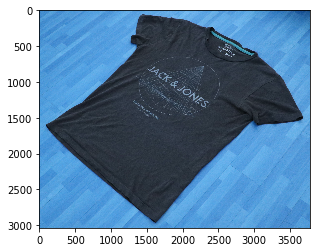

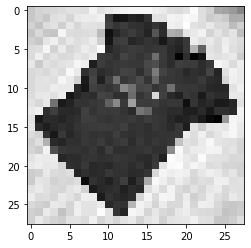

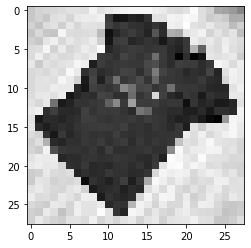

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
8
Bag


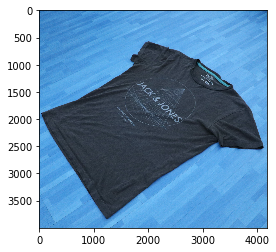

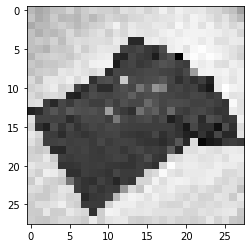

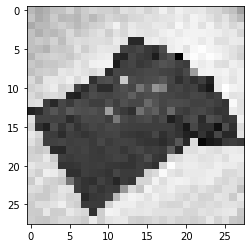

[[9.1963162e-04 3.7711045e-05 4.3082228e-01 5.0987583e-01 5.0528076e-02
  4.2913121e-07 7.8077866e-03 3.4132938e-08 8.2380702e-06 2.7476119e-08]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
3
Dress


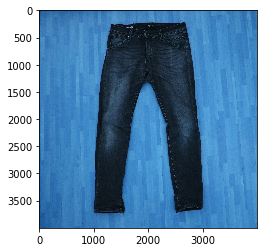

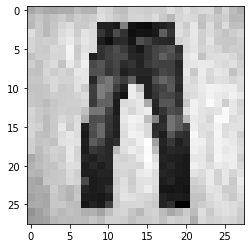

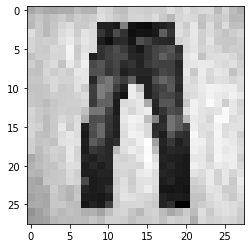

[[1.11617909e-33 0.00000000e+00 1.09337615e-10 0.00000000e+00
  2.98661047e-30 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
6
Shirt


In [12]:
imgs = []
imgs.append(cv2.imread('shoe_1.JPG',1))
imgs.append(cv2.imread('shoe_2.JPG',1))
imgs.append(cv2.imread('shoe_3.JPG',1))
imgs.append(cv2.imread('tshirt_1.JPG',1))
imgs.append(cv2.imread('tshirt_2.JPG',1))
imgs.append(cv2.imread('tshirt_3.JPG',1))
imgs.append(cv2.imread('pants_1.JPG',1))


for img in imgs:
    plt.imshow(img)
    plt.show()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    myPic = cv2.resize(gray, (28,28))
    #myPic = cv2.bitwise_not(myPic)
    plt.imshow(cv2.resize(gray, (28,28)), cmap="gray")
    plt.show()
    
    plt.imshow(cv2.resize(myPic, (28,28)), cmap="gray")
    plt.show()
    

    x = []
    x.append(myPic)
    
    result = dropout_model.predict(np.asarray(x).reshape((-1, 28, 28, 1)).astype(float))
    print(result)
    print(labels)
    max_index = result.argmax(axis=1)
    
    print(labels[max_index[0]])